# Real-World Data Preprocessing and Feature Engineering

## Task 1: Handling Missing Data – Titanic Dataset
Dataset file: **titanic.csv**

In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
print(df.isnull().sum())

# Fill numerical with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill categorical with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop cabin due to too many missing
df = df.drop(columns=['Cabin'])

print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


## Task 2: Encoding Categorical Variables – Car Evaluation Dataset
Dataset file: **car.data**

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

cols = ['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv('car.data', names=cols)

print(df.head())

# Label Encoding
le = LabelEncoder()
for col in df.columns:
    df[col+'_label'] = le.fit_transform(df[col])

print(df.head())

# One-Hot Encoding
df_onehot = pd.get_dummies(df[cols])
print(df_onehot.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
  buying  maint doors persons lug_boot safety  class  buying_label  \
0  vhigh  vhigh     2       2    small    low  unacc             3   
1  vhigh  vhigh     2       2    small    med  unacc             3   
2  vhigh  vhigh     2       2    small   high  unacc             3   
3  vhigh  vhigh     2       2      med    low  unacc             3   
4  vhigh  vhigh     2       2      med    med  unacc             3   

   maint_label  doors_label  persons_label  lug_boot_label  safety_label  \
0            3            0              0               2             1   
1            3            0              0               2             2   
2            3            0      

## Task 3: Feature Scaling – Wine Quality Dataset
Dataset file: **winequality-red.csv**

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv('winequality-red.csv', sep=';')

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

X = df.drop('quality', axis=1)

X_std = scaler_std.fit_transform(X)
X_minmax = scaler_minmax.fit_transform(X)

print('Standardized Mean:', X_std.mean())
print('MinMax Range:', X_minmax.min(), X_minmax.max())

Standardized Mean: -2.7647703016329102e-15
MinMax Range: 0.0 1.0000000000000002


## Task 4: Handling Outliers – Boston Housing Dataset
Dataset file: **BostonHousing.csv**

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('boston-housing.csv')

# Z-score method
from scipy import stats
z = np.abs(stats.zscore(df))
print((z>3).sum())

# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
filtered = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

print('Original:', df.shape, 'Filtered:', filtered.shape)

36
Original: (173, 14) Filtered: (101, 14)


## Task 5: Advanced Data Imputation – Retail Sales Dataset
Dataset file: **retail_sales.csv**

In [6]:
import pandas as pd
from sklearn.impute import KNNImputer

df = pd.read_csv('retail_sales_dataset.csv')

knn = KNNImputer(n_neighbors=5)
df_imputed = knn.fit_transform(df.select_dtypes(include=['float64','int64']))

print('Imputation done using KNN')

Imputation done using KNN


## Task 6: Feature Engineering – Heart Disease Dataset
Dataset file: **heart.csv**

In [12]:
import pandas as pd

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv('processed.cleveland.data', names=columns)

df = df.replace('?', pd.NA)

for col in ['age','trestbps','chol','thalach','oldpeak','ca','thal']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# now create new features
df['AgeGroup'] = pd.cut(
    df['age'], 
    bins=[0,30,40,50,60,100], 
    labels=['<30','30-40','40-50','50-60','60+']
)

df['CholCat'] = pd.cut(
    df['chol'], 
    bins=[0,200,240,600], 
    labels=['Normal','Borderline','High']
)

print(df[['age','AgeGroup','chol','CholCat']].head())

    age AgeGroup   chol     CholCat
0  63.0      60+  233.0  Borderline
1  67.0      60+  286.0        High
2  67.0      60+  229.0  Borderline
3  37.0    30-40  250.0        High
4  41.0    40-50  204.0  Borderline


## Task 7: Variable Transformation – Bike Sharing Dataset
Dataset file: **day.csv**

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox

df = pd.read_csv('day.csv')

df['log_cnt'] = np.log1p(df['cnt'])
df['sqrt_cnt'] = np.sqrt(df['cnt'])

df['boxcox_cnt'], _ = boxcox(df['cnt']+1)

print(df[['cnt','log_cnt','sqrt_cnt','boxcox_cnt']].head())

    cnt   log_cnt   sqrt_cnt  boxcox_cnt
0   985  6.893656  31.384710  499.329506
1   801  6.687109  28.301943  415.834439
2  1349  7.207860  36.728735  659.495676
3  1562  7.354362  39.522146  750.805907
4  1600  7.378384  40.000000  766.938328


## Task 8: Feature Selection – Diabetes Dataset
Dataset file: **diabetes.csv**

In [14]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('diabetes.csv')

print(df.corr()['Outcome'])

X = df.drop('Outcome', axis=1)
y = df['Outcome']

model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X,y)
print('Selected Features:', X.columns[rfe.support_])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64
Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


## Task 9: Handling Imbalanced Data – Credit Card Fraud Detection
Dataset file: **creditcard.csv**

In [15]:
import pandas as pd
from imblearn.over_sampling import SMOTE

df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)
print('Before:', y.value_counts())
print('After:', y_res.value_counts())

Before: Class
0    284315
1       492
Name: count, dtype: int64
After: Class
0    284315
1    284315
Name: count, dtype: int64


## Task 10: Combining Multiple Datasets – MovieLens Dataset
Dataset file: **ratings.csv + movies.csv + users.csv**

In [16]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
users = pd.read_csv('tags.csv')

merged = ratings.merge(movies, on='movieId').merge(users, on='userId')
print(merged.head())

   userId  movieId_x  rating  timestamp_x                             title  \
0       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   
1       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   
2       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   
3       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   
4       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   

        genres  movieId_y              tag  timestamp_y  
0  Crime|Drama      60756            funny   1445714994  
1  Crime|Drama      60756  Highly quotable   1445714996  
2  Crime|Drama      60756     will ferrell   1445714992  
3  Crime|Drama      89774     Boxing story   1445715207  
4  Crime|Drama      89774              MMA   1445715200  


## Task 11: Dimensionality Reduction – MNIST Dataset
Dataset file: **mnist.csv**

Explained variance ratio (sum of 10 first): 0.7382267688459532


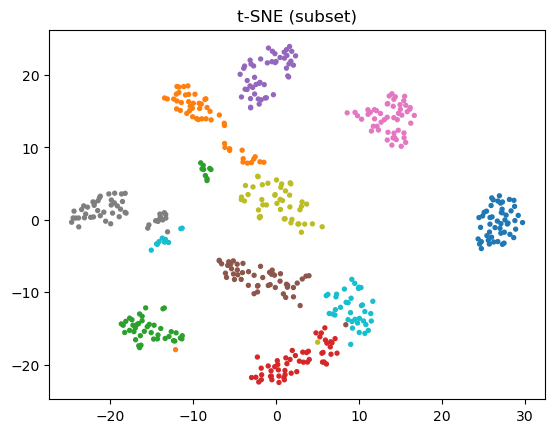

In [20]:
# Task 11: Dimensionality Reduction (MNIST / digits)
import os, pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=50, random_state=0)
X_pca = pca.fit_transform(X)
print("Explained variance ratio (sum of 10 first):", pca.explained_variance_ratio_[:10].sum())

subset = 500 if len(X) > 500 else len(X)
tsne = TSNE(n_components=2, random_state=0, perplexity=30, max_iter=500)
X2 = tsne.fit_transform(X[:subset])
plt.scatter(X2[:,0], X2[:,1], c=y[:subset], cmap='tab10', s=8)
plt.title('t-SNE (subset)')
plt.show()
